In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import plotly.express as px

In [2]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

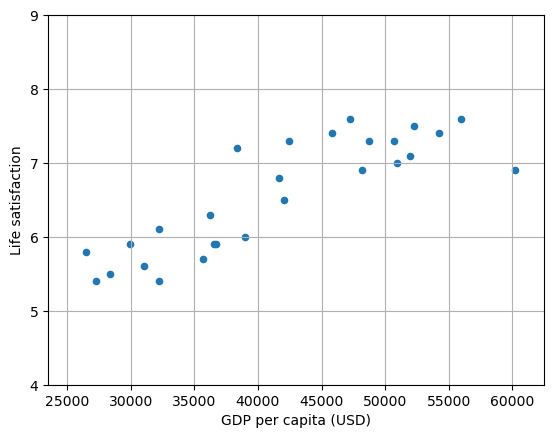

In [3]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [21]:
df = pd.DataFrame({'GDP':X.squeeze(), 'Life satisfaction': y.squeeze()})
px.scatter(df, x='GDP', y='Life satisfaction')

In [22]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression()

In [23]:
# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # output: [[6.30165767]]

[[6.30165767]]


In [24]:
# Using an instance based learner like knn

from sklearn.neighbors import KNeighborsRegressor
instance_model = KNeighborsRegressor(n_neighbors=3)

In [25]:
instance_model.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [26]:
instance_model.predict(X_new)

array([[6.33333333]])

### Exercises
In this chapter we have covered some of the most important concepts in machine learning. In the next chapters we will dive deeper and write more code, but before we do, make sure you can answer the following questions:

1. How would you define machine learning?
1. Can you name four types of applications where it shines?
1. What is a labeled training set?
1. What are the two most common supervised tasks?
1. Can you name four common unsupervised tasks?
1. What type of algorithm would you use to allow a robot to walk in various unknown terrains?
1. What type of algorithm would you use to segment your customers into multiple groups?
1. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?
1. What is an online learning system?
1. What is out-of-core learning?
1. What type of algorithm relies on a similarity measure to make predictions?
1. What is the difference between a model parameter and a model hyperparameter?
1. What do model-based algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?
1. Can you name four of the main challenges in machine learning?
1. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?
1. What is a test set, and why would you want to use it?
1. What is the purpose of a validation set?
1. What is the train-dev set, when do you need it, and how do you use it?
1. What can go wrong if you tune hyperparameters using the test set?

### Solutions

1. Machine learning could be defined as a piece of software that can learn to extract patterns from arbitrary input data with minimal human intervention.  While performance on individual samples may not currently or ever match human performance (ignore reinforcement learning) as that is not the goal, the real strongsuit lies in the scalability of being able to apply the learnt model to a huge magnitude of samples.

2. ML works well in time-series forecasting - predicting some future value of a time-series (stocks, weather etc.) given the past values + any extra external data, language modelling - predicting the likelihood of which words follow other words, and recommendation systems - figuring out the next best item to recommend to user x based on all their product interactions + interactions of other users with other products.

3. A labelled training set is a dataset that is comprised of two parts, the input data and target labels, the goal of an ml system is to then approximate the labels for input data and compare errors against the real labels.

4. Regression and classification

5. Clustering, mask filling (cloze objective), auto-encoding (building a model that compresses inputs to a latent space then also learns to decode it back to be as close to the original as possible), and dimensionality reduction

6. A reinforcement-learning algorithm

7. An unsupervised clustering algorithm like kmeans or dbscan

8. Depending on the approach, spam detection could be classified as a supervised problem since labelled data can be used to predict new spam messages based on patterns learnt from the inputs

9. A system that learns from mini-batches of data rather than having to be always trained on the full set (for neural nets think of optimisers like sgd or adam)

10. Similar to online-learning, but with the difference that the input data is too large to fit into memory so there is no choice between offline or online

11. A nearest neighbour algorithm

12. A model parameters is learnt / updated by the training process while a hyperparameter is set explicitly by the programmer or model building software package

13. Model based algorithms search for the optimal set of parameters to use to make predictions from input data to targets with the least amount of error possible.  In the case of a linear regression or NN type model, inference is formed of a sequence of geometric transforms with input data and weights / parameters, then the output is compared to the targets then that loss is differentiated to estimate the effect of each parameter. 

14. Not enough data, Noisy data, Biased data, Mismatch between training data and data running through the model in production

15. This is overfitting, we can help solve this by using more data, changing to a simpler model, or increasing the regularisation that is applied to our model to restrict its predictive power

16. A test or holdout set is used as a final evaluative measure in our ml development pipline to choose the best model / parameter combination that generalises best to data not seen in training

17. The validation set is used to regularly evaluate overfitting and generalisation

18. This one is a bit ambiguous and I don't think it was completely answered in the source text nor was there a reference to the source.  The train-dev set is a supplementary dataset, similar to your actual train set, that you train and evaluate on to help inform you whether your model is capable of learning the target problem.  This is usually used in the scenario where the actual train set is quite small.

I might be a bit wrong on this; after some more googling I found someone else's notes on the Andrew NG course which states this set is more like a subset of the training set that you can train on, evaluate on the rest of the train set and then compare the variance / distribution of reduals on this set vs the residuals on the validation set to ensure you don't overbias towards the validation set.  Which could be a problem when the train and subsequent sets aren't fully representative of each other.

19. This would lead to selection bias, where we are overfitting our model to the chosen selection of data.  In most cases of this performance on real data will be worse than the train set.